In [7]:
# imports from Qiskit
from numpy import pi
import numpy as np
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [8]:
# imports from backend providers (IBM for superconductor, AQT for trapped ion)
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aqt import AQT

ibmq_provider = IBMQ.load_account()        # credentials stored on disk
aqt_provider_simulators = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')  # simulator credentials
# aqt_provider_device = AQT.enable_account('INPUT DEVICE CREDENTIALS HERE') # hardware credentials

ibmq_simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
ibmq_device = ibmq_provider.get_backend('ibmq_burlington')
aqt_simulator = aqt_provider_simulators.get_backend('aqt_qasm_simulator')
# calling noisy simulator the 'device' for now
aqt_device = aqt_provider_simulators.get_backend('aqt_qasm_simulator_noise_1')

Credentials are already in use. The existing account in the session will be replaced.


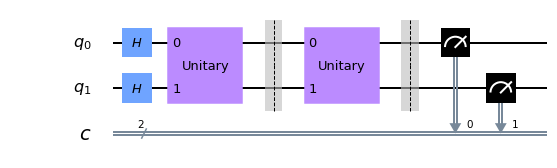

In [9]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)

# creating a randomized Grover operator
# a = randint(0,3)
A = np.identity(4)
A[0,0] = -1
Grov = Operator(A)
qc.append(Grov,[0,1])

qc.barrier()
# defining the operator to implement inversion about the mean
MeanInv = 0.5*np.ones((4,4),float)
np.fill_diagonal(MeanInv,-0.5)
MeanInv = Operator(MeanInv)
qc.append(MeanInv,[0,1])

qc.barrier()
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

In [10]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Backend in use:  aqt_qasm_simulator


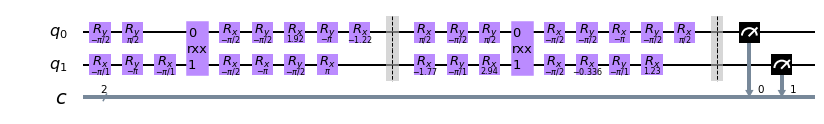

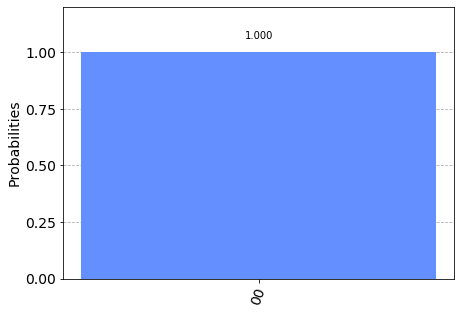

Done
Backend in use:  ibmq_qasm_simulator


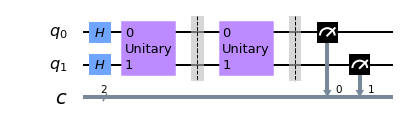

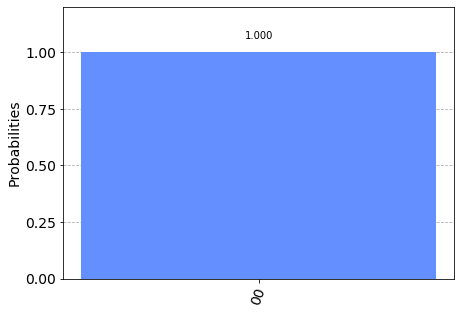

Done
Backend in use:  aqt_qasm_simulator_noise_1


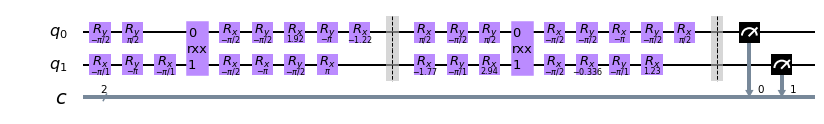

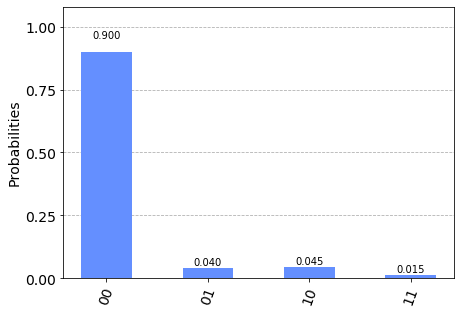

Done
Backend in use:  ibmq_burlington


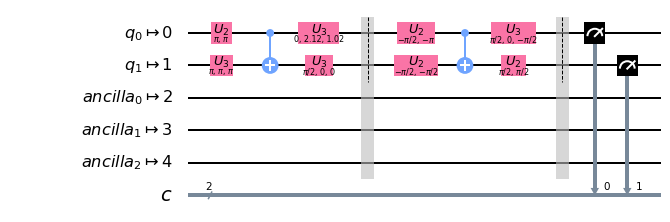

Job Status: job is queued (6)     

In [ ]:
# transpile, plot circuit, run, plot result
backends = [aqt_simulator, ibmq_simulator, aqt_device, ibmq_device]
for be in backends:
    print("Backend in use: ", be)
    new_qc = transpile(qc, be)
    new_qc.draw(output='mpl', scale=0.5)

    job = execute(new_qc, be, shots=200)
    if be == ibmq_device:
        job_monitor(job)
    counts = job.result().get_counts()
    plot_histogram(counts)
    print('Done')
    
    if be == aqt_simulator:
        aqt_sim_results = job.result()
        aqt_sim_counts = job.result().get_counts()
    if be == ibmq_simulator:
        ibmq_sim_results = job.result()
        ibmq_sim_counts = job.result().get_counts()
    if be == aqt_device:
        aqt_dev_results = job.result()
        aqt_dev_counts = job.result().get_counts()
    if be == ibmq_device:
        ibmq_dev_results = job.result()
        ibmq_dev_counts = job.result().get_counts()

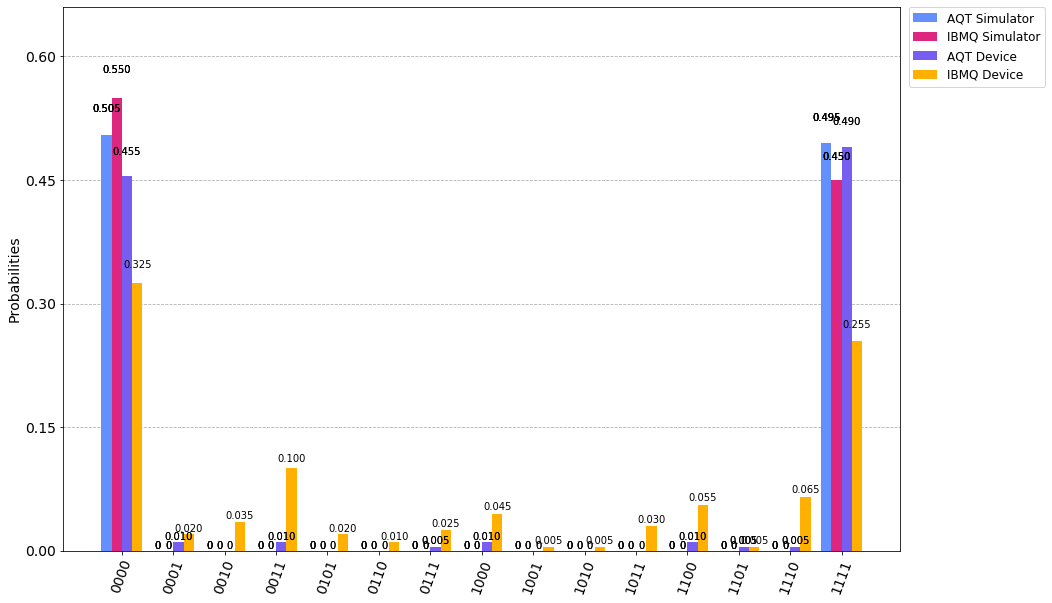

In [6]:
# plotting the results together
plot_histogram([aqt_sim_counts, ibmq_sim_counts, aqt_dev_counts, ibmq_dev_counts], 
               legend = ['AQT Simulator', 'IBMQ Simulator', 'AQT Device', 'IBMQ Device'],
               figsize = (15,10))

In [8]:
# restore display settings
InteractiveShell.ast_node_interactivity = "last_expr"

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table